Classificação utilizando MLP e KNN na base:
* https://www.kaggle.com/fedesoriano/heart-failure-prediction
* Foi utilizado uma comparação entre métodos de otimização de hiperparamentros

In [31]:
#Imports
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
import numpy as np

import pyswarms as ps
from pyswarms.single.global_best import GlobalBestPSO


In [2]:
#https://www.kaggle.com/fedesoriano/heart-failure-prediction
df = pd.read_csv ('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


**Dataset com 918 linhas e 12 colunas.**

In [3]:
#Checar status e tipos de variáveis
df.info()
print('\n')
print(df.shape)
print('\n')
#Chegar se existe observações duplicadas. Não existem observações duplicadas.
print("Qunatidade de dados duplicados", len(df[df.duplicated()]))
#Não existe dados ausentes
print("Qunatidade de dados 'NA':", df.isna().sum().sum())
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


(918, 12)


Qunatidade de dados duplicados 0
Qunatidade de dados 'NA': 0




**Sem valores faltantes**

In [4]:
# Descrição dos dados não-string
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:


# A transformação acima apenas foi usada para separar os nomes das colunas entre numéricas não-categóricas 
# e categóricas (apenas no formato string - objeto)
num_cols = [col for col in df.columns if df[col].dtype != "object"]
cat_cols = [col for col in df.columns if col not in num_cols]

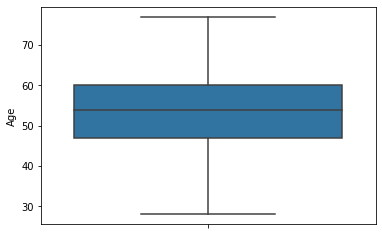

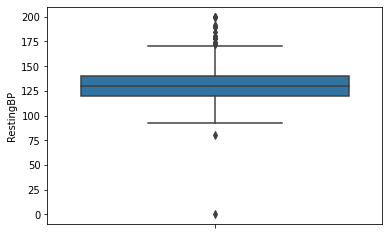

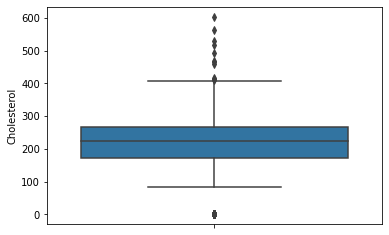

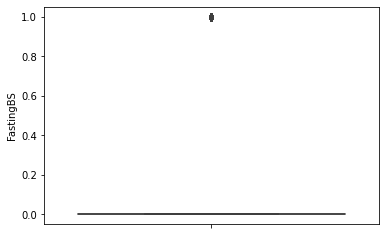

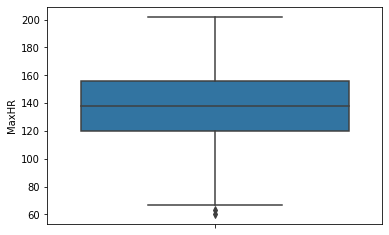

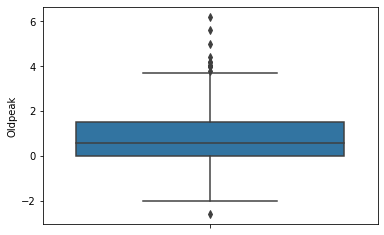

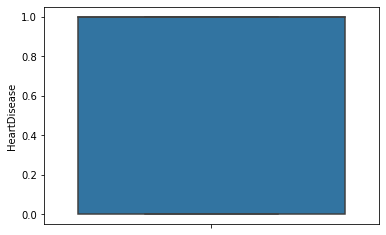

In [6]:
for col in num_cols:
    sns.boxplot(y = col , data = df)
    plt.show()

**Verificar colunas do tipo object e converter para o tipo necessario**


In [7]:
#Verificando Possiveis valores estranho
df['Sex'].unique()

array(['M', 'F'], dtype=object)

In [8]:
#Verificando Possiveis valores estranho
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [9]:
#Verificando Possiveis valores estranho
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [10]:
#Verificando Possiveis valores estranho
df['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [11]:
#Verificando Possiveis valores estranho
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [12]:
#Mudando para categorico
df['Sex'] = df['Sex'].astype('category')
df['ChestPainType'] = df['ChestPainType'].astype('category')
df['RestingECG'] = df['RestingECG'].astype('category')
df['ExerciseAngina'] = df['ExerciseAngina'].astype('category')
df['ST_Slope'] = df['ST_Slope'].astype('category')
df['HeartDisease'] = df['HeartDisease'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             918 non-null    int64   
 1   Sex             918 non-null    category
 2   ChestPainType   918 non-null    category
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    int64   
 6   RestingECG      918 non-null    category
 7   MaxHR           918 non-null    int64   
 8   ExerciseAngina  918 non-null    category
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    category
 11  HeartDisease    918 non-null    int32   
dtypes: category(5), float64(1), int32(1), int64(5)
memory usage: 51.9 KB


## Análise de Outliers e Imputação de Dados

**As variáveis não-categóricas 'RestingBP' e 'Cholesterol' apresentam outliers "estranhos".**

In [13]:
# A variável 'RestingBP', que guarda dados sobre pressão sanguínea, possui um valor com pressão zero
# Esse valor não faz sentido

row = df[df['RestingBP']==0].index
df = df.drop(df.index[row])

In [14]:
# Muitos dados da variável 'Cholesterol' apresentam valor de colesterol zero.
# É estranho esse dado. Alguma pessoa viva tem colesterol zero? 

IQR = np.percentile(df["Cholesterol"],75) - np.percentile(df["Cholesterol"],25)
lower_bound = np.percentile(df["Cholesterol"],25) - 1.5 * IQR
upper_bound = np.percentile(df["Cholesterol"],75) + 1.5 * IQR
median_cholesterol = np.median(df["Cholesterol"])

df["Cholesterol"] = np.where(((df["Cholesterol"] > upper_bound) | (df["Cholesterol"] < lower_bound)) 
                                 ,random.randint(int(np.percentile(df["Cholesterol"],25)),
                                                 int(np.percentile(df["Cholesterol"],75))),df["Cholesterol"])



A inputção dos dados aqui ta meio confusa, não entendi por que você escolheu usar dessa forma

### Enconding 

In [15]:
#utilizando a biblioteca LabelEncoder  do sklearn para fazer o cadificação dos tipos categoricos.
for i in df:
    #instânciando o codificador
    labelencoder= LabelEncoder()
    
    if df[i].dtype.name == "category":
        #codificando e substituindo
        df[i] = labelencoder.fit_transform(df[i])
df
    
    

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [16]:
#normalizando pelo min max
df=(df-df.min())/(df.max()-df.min())

<AxesSubplot:>

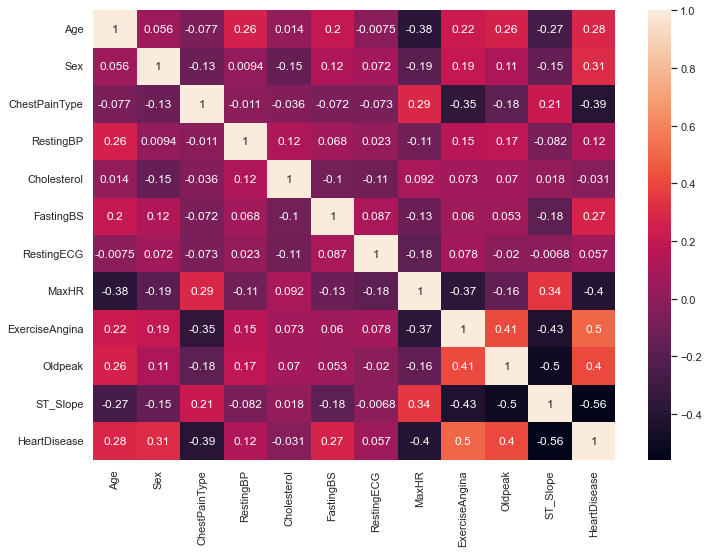

In [17]:
#Verificando se o encoding levou a alguma correlação indesejada
corr = df.corr()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=True)

**Nenhuma correlação das colunas transformadas chega até acima de |0.5|**

## Pré processamento para a base de dados.

In [18]:
#Pegando todas as colunas menos a coluna target da classificação
#e transformando no formato numpy
x_data = df.loc[:, df.columns != 'HeartDisease'].to_numpy() 
#Pegando a coluna target e transformando em numpy
y_data = df['HeartDisease'].to_numpy()

In [19]:
#distribuição dos target
df['HeartDisease'].value_counts()

1.0    507
0.0    410
Name: HeartDisease, dtype: int64

In [26]:
#Utilizando apenas treino e testo, já que para o knn não faz sentindo ter validação.
#25% para teste
X_train, X_test, y_train, y_test =  train_test_split(x_data, y_data , random_state=1, test_size=.25)
#50% treino, 25% teste
X_train_o, X_test_o, y_train_o, y_test_o =  train_test_split(X_train, y_train , random_state=1, test_size=.3333)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape )
print(X_train_o.shape, y_train_o.shape, X_test_o.shape, y_test_o.shape )

(687, 11) (687,) (230, 11) (230,)
(458, 11) (458,) (229, 11) (229,)


## GridSearch

In [27]:
#definindo os limites de k
limite_superior = 100
limite_inferior = 1 
limite = list(range(limite_inferior,limite_superior))
#Parametros a serem escolhidos
params = {'n_neighbors':limite, 'metric':['euclidean','manhattan']}
#istanciando 
gridS = GridSearchCV(KNeighborsClassifier(),params,cv=10 )
#treinando o grid 
grid_result = gridS.fit(X_train,y_train)

grid_result.best_params_


{'metric': 'manhattan', 'n_neighbors': 15}

In [28]:
#instanciando o knn com os parametros encontrados
clf = KNeighborsClassifier(metric = grid_result.best_params_['metric'], n_neighbors = grid_result.best_params_['n_neighbors']  )
#treinando o knn
clf.fit(X_train, y_train)
#print do resultados
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.80      0.81      0.81        97
         1.0       0.86      0.85      0.86       133

    accuracy                           0.83       230
   macro avg       0.83      0.83      0.83       230
weighted avg       0.84      0.83      0.83       230



## PSO

In [29]:
#função fitness
def fitness(k,X_train,y_train,X_test,y_test):
    #escolha do tipo de calculo de distância
    if int(k[0,1])==1:
        metric = 'euclidean'
    else:
        metric = 'manhattan'
    #instanciando o knn
    clf = KNeighborsClassifier(n_neighbors = int(k[0,0]), metric = metric)
    #treinando
    clf.fit(X_train, y_train)
    #buscando a acc
    acc = classification_report(y_test, clf.predict(X_test), output_dict=True)['accuracy']
    #maximizando a acc
    return 1-acc 
#limites
#maior valor de k 100 
max_bound = np.array([101,3])
#menor valor de k 1
min_bound = np.array([1,1])
bounds = (min_bound, max_bound)

#hiperparametros do PSO
options = {'c1': 0.3, 'c2': 0.3, 'w': 0.5}
#otimizador do PSO
optimizer = GlobalBestPSO(n_particles=10, dimensions=2, options=options, bounds = bounds )
#moendo
cost, pos = optimizer.optimize(fitness, iters = 1000, X_train=X_train_o ,y_train=y_train_o,X_test=X_test_o,y_test=y_test_o)

2021-11-07 19:48:27,963 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.3, 'c2': 0.3, 'w': 0.5}
pyswarms.single.global_best: 100%|███████████████████████████████████████████████████████████|1000/1000, best_cost=0.14
2021-11-07 19:48:47,353 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.13973799126637554, best pos: [29.74294182  1.12187183]


In [30]:
#buscando a metrica de distancia escolhida
if int(pos[1])==1:
    metric = 'euclidean'
else:
    metric = 'manhattan'
#instanciando o knn com as metricas encontradas no PSO
clf = KNeighborsClassifier(metric = metric, n_neighbors = int(pos[0])  )
#treinando o knn
clf.fit(X_train, y_train)
#print do resultados
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81        97
         1.0       0.86      0.86      0.86       133

    accuracy                           0.84       230
   macro avg       0.83      0.84      0.84       230
weighted avg       0.84      0.84      0.84       230



## MLP

## Grid

In [32]:
mlp = MLPClassifier(max_iter=1000)

params = {
    'hidden_layer_sizes': [(8,8),(316,16),(32,32), (32,64), (64,128)],
    'activation': ['tanh', 'relu'],
    'solver':['sgd','adam'],
    'alpha':[0.0001, 0.05],
    'learning_rate': ['constante','adaptive'],
}

gridS = GridSearchCV(mlp,params,n_jobs=-1,cv=3)
grid_result = gridS.fit(X_train,y_train)

grid_result.best_params_

C:\Users\Bruno\Anaconda3\envs\DataScience\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.83551674 0.82678311        nan        nan
 0.83988355 0.84570597        nan        nan 0.84425036 0.83988355
        nan        nan 0.84716157 0.85007278        nan        nan
 0.85007278 0.83842795        nan        nan 0.82969432 0.85152838
        nan        nan 0.83842795 0.84425036        nan        nan
 0.84279476 0.84861718        nan        nan 0.84570597 0.84716157
        nan        nan 0.84425036 0.84279476        nan        nan
 0.83406114 0.83551674        nan        nan 0.83988355 0.82532751
        nan        nan 0.84570597 0.81804949        nan        nan
 0.83697234 0.83114993        nan        nan 0.83697234 0.8224163
        nan        nan 0.82532751 0.84861718        nan        nan
 0.83842795 0.82532751        nan        nan 0.83988355 0.84425036
        nan        nan 0.83988355 0.8

{'activation': 'tanh',
 'alpha': 0.05,
 'hidden_layer_sizes': (8, 8),
 'learning_rate': 'adaptive',
 'solver': 'adam'}

In [33]:
mlp = MLPClassifier(hidden_layer_sizes=grid_result.best_params_['hidden_layer_sizes'], 
                    activation=grid_result.best_params_['activation'], solver=grid_result.best_params_['solver'],
                    alpha=grid_result.best_params_['alpha'],
                    learning_rate=grid_result.best_params_['learning_rate'], max_iter=1000)

mlp.fit(X_train, y_train)

print(classification_report(y_test, mlp.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.83      0.86      0.84        97
         1.0       0.89      0.87      0.88       133

    accuracy                           0.87       230
   macro avg       0.86      0.86      0.86       230
weighted avg       0.87      0.87      0.87       230



## PSO

In [35]:
# Função fitness
def fitness(p,X_train,y_train,X_test,y_test):

# p é a matriz com os valores dos bounds
    if int(p[0,2])==1:
        activation = 'tanh'
    else:
        activation = 'relu'
    
    if int(p[0,3])==1:
        solver = 'sgd'
    else:
        solver = 'adam'
        
    if int(p[0,4])==1:
        alpha = 0.0001
    else:
        alpha = 0.05
        
    if int(p[0,5])==1:
        learning_rate = 'constant'
    else:
        learning_rate = 'adaptive'
        
    mlp = MLPClassifier(hidden_layer_sizes=(int(p[0,0]),int(p[0,1])), 
                    activation=activation, solver=solver,
                    alpha=alpha,
                    learning_rate=learning_rate, max_iter=1000)
    mlp.fit(X_train, y_train)

    # Buscando a acurácia
    acc = classification_report(y_test, mlp.predict(X_test), output_dict=True)['accuracy']
    # A acurácia (acc) é uma função linear que varia de 0% a 100%. Logo o seu mínimo é 0% e o seu mínimo representa o
    # pior caso. No entanto, queremos o melhor caso -> tendência para 100%
    # Como o PSO trabalha referenciando o mínimo da função como o melhor caso, então temos que retornar 1-acc
    # tendência para 100%
    return 1-acc 

# Limites da fronteira do PSO -> são os hiperparâmetros de MLP que serão referênciados na função fitness
# Note que na função fitness estamos considerando 5 hiperparâmetros - note a função MLPClassifier()
max_bound = np.array([128,128,3,3,3,3])
# Menor valor de k 1
min_bound = np.array([2,2,1,1,1,1])
bounds = (min_bound, max_bound)

# Hiperparametros do PSO
options = {'c1': 0.3, 'c2': 0.3, 'w': 0.5}
# Otimizador do PSO
optimizer = GlobalBestPSO(n_particles=10, dimensions=6, options=options, bounds = bounds )
# Buscando os melhores valores para os hiperparâmetros da MLP (pos)
cost, pos = optimizer.optimize(fitness,iters=1000,X_train=X_train_o ,y_train=y_train_o,X_test=X_test_o,y_test=y_test_o)

2021-11-07 20:05:30,629 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.3, 'c2': 0.3, 'w': 0.5}
pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|1000/1000, best_cost=0.0917
2021-11-07 20:29:25,493 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.09170305676855894, best pos: [107.51743943 110.77863818   1.95166735   2.25075714   2.06730753
   1.3627953 ]


In [36]:
if int(pos[2])==1:
    activation = 'tanh'
else:
    activation = 'relu'
    
if int(pos[3])==1:
    solver = 'sgd'
else:
    solver = 'adam'
        
if int(pos[4])==1:
    alpha = 0.0001
else:
    alpha = 0.05
        
if int(pos[5])==1:
    learning_rate = 'constant'
else:
    learning_rate = 'adaptive'

mlp = MLPClassifier(hidden_layer_sizes=(int(pos[0]),int(pos[1])), 
                    activation=activation, solver=solver,
                    alpha=alpha,
                    learning_rate=learning_rate, max_iter=1000)

mlp.fit(X_train, y_train)

print(classification_report(y_test, mlp.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.79      0.84      0.81        97
         1.0       0.88      0.84      0.86       133

    accuracy                           0.84       230
   macro avg       0.83      0.84      0.84       230
weighted avg       0.84      0.84      0.84       230

